# Table of Contents
* [Molecfit Refenence](#Molecfit-Refenence)


# Molecfit Refenence

- Explain the different parts of the output files.

In [64]:
# Module to read data
import numpy as np
from astropy.io import fits
import os
import matplotlib.pyplot as plt


def tac_molecfit(filename):
    # Read result file after the fit over full wavelength range and
    # telluric correction (= division by the atmospheric transmission)
    # wavelengths (wl) in microns and vacuum
    hdu_molecfit = fits.open(filename)
    data_molecfit = hdu_molecfit[1].data
    wl_input = data_molecfit.field('lambda')
    wl_model = data_molecfit.field('mlambda')
    input_flux = data_molecfit.field('flux')
    corr_flux = data_molecfit.field('cflux')
    mtrans = data_molecfit.field('mtrans')
    weight = data_molecfit.field('weight')
    mweight = data_molecfit.field('mweight')
    qual = data_molecfit.field('qual')
    return wl_input, wl_model, input_flux, corr_flux, mtrans, qual, weight, mweight


def molecfit_fit(filename):
    # result file after the fit
    # in the fitting regions
    # Wl in microns and vacuum
    hdu_molecfit = fits.open(filename)
    data_molecfit = hdu_molecfit[1].data
    wl_input = data_molecfit.field('lambda')
    wl_model = data_molecfit.field('mlambda')
    input_flux = data_molecfit.field('flux')
    mtrans = data_molecfit.field('mtrans')
    weight = data_molecfit.field('weight')
    mweight = data_molecfit.field('mweight')
    mrange = data_molecfit.field('mrange')
    mscal = data_molecfit.field('mscal')
    mflux = data_molecfit.field('mflux')
    dev = data_molecfit.field('dev')
    return wl_input, input_flux, weight, mrange, wl_model, mscal, mflux, mweight, dev, mtrans


def TAC_molecfit(filename):
    # Read file TAC
    # the wavelength are in the original format
    # ------------------------------------------
    hdu = fits.open(filename)
    header = hdu[1].header
    name = os.path.basename(filename)
    wl = hdu[1].data.field('WAVE')
    input_flux = hdu[1].data.field('SPEC')
    input_cont = hdu[1].data.field('CONT')
    input_error = hdu[1].data.field('SIG')
    corr_flux = hdu[1].data.field('tacflux')
    mtrans = hdu[1].data.field('mtrans')
    qual = hdu[1].data.field('tacqual')
    # I have change the wave by a factor of 10
    wl = wl/10
    return name, header, wl*0.001, input_flux, input_cont, input_error, corr_flux, mtrans, qual



In [65]:
path = "/home/jneal/Phd/Collaborations/Carmenes-correction/barnard_star"
import os
os.chdir(path)

file0 = 'car-20160325T05h28m38s'  
filename = 'output/' + file0 + '-sci-gtoc-nir_A_tell_tac.fits'

# example

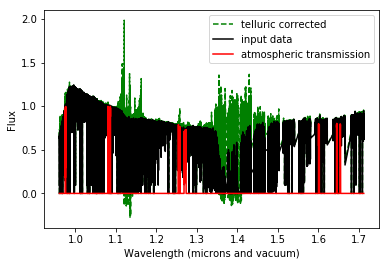

In [108]:
# Load spectrum

file0 = 'car-20160325T05h28m38s'
filename = 'output/' + file0 + '-sci-gtoc-nir_A_tell_tac.fits'
filename2 = 'output/' + file0 + '-sci-gtoc-nir_A_tell_fit.fits'
filename3 = 'output/' + 'car-20160325T05h28m38s-sci-gtoc-nir_A_input_TAC.fits'
wl_input, wl_model, input_flux, corr_flux, mtrans, qual, weight, mweight = tac_molecfit(filename)
plt.plot(wl_input, corr_flux, 'g--', label='telluric corrected')
plt.plot(wl_input, input_flux, 'k-', label='input data')
wl_input, input_flux, weight, mrange, wl_model, mscal, mflux, mweight, dev, mtrans = molecfit_fit(filename2)
plt.plot(wl_input, mtrans*mscal, 'r-', label='atmospheric transmission')
plt.xlabel('Wavelength (microns and vacuum)')
plt.ylabel('Flux')
plt.legend()
plt.show()

name, header, wl, input_flux, input_cont, input_error, corr_flux, mtrans, qual = TAC_molecfit(filename3)


## Filename 1 \*_tell_tac.fits

- input_flux = input data
- corr_flux = Telluric corrected 

In [66]:
# Load spectrum
filename = 'output/' + file0 + '-sci-gtoc-nir_A_tell_tac.fits'
wl_input, wl_model, input_flux, corr_flux, mtrans, qual, weight, mweight = tac_molecfit(filename)


filename2 = 'output/' + file0 + '-sci-gtoc-nir_A_tell_fit.fits'
wl_input2, input_flux2, weight2, mrange2, wl_model2, mscal2, mflux2, mweight2, dev2, mtrans2 = molecfit_fit(filename2)

# TAC.fits
filename3 = 'output/' + 'car-20160325T05h28m38s-sci-gtoc-nir_A_input_TAC.fits'
name3, header3, wl3, input_flux3, input_cont3, input_error3, corr_flux3, mtrans3, qual3 = TAC_molecfit(filename3)

print(len(wl_input))
print(len(wl_input2))
print(len(wl3))

print(name3)


108553
108553
108553
car-20160325T05h28m38s-sci-gtoc-nir_A_input_TAC.fits


In [67]:
# Print headers

hdu = fits.open(filename)
header = hdu[1].header
print("File1")
print(header)

hdu2 = fits.open(filename2)
header2 = hdu[1].header
print("File2")
print(header2)

hdu3 = fits.open(filename3)
header3 = hdu3[1].header
print("File3")
print(header3)

File1
XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / 8-bit bytes                                    NAXIS   =                    2 / 2-dimensional binary table                     NAXIS1  =                   64 / width of table in bytes                        NAXIS2  =               108553 / number of rows in table                        PCOUNT  =                    0 / size of special data area                      GCOUNT  =                    1 / one data group (required keyword)              TFIELDS =                    9 / number of fields in each row                   TTYPE1  = 'chip    '           / label for field   1                            TFORM1  = '1J      '           / data format of field: 4-byte INTEGER           TTYPE2  = 'lambda  '           / label for field   2                            TFORM2  = '1D      '           / data format of field: 8-byte DOUBLE            TTYPE3  = 'flux    '           / l

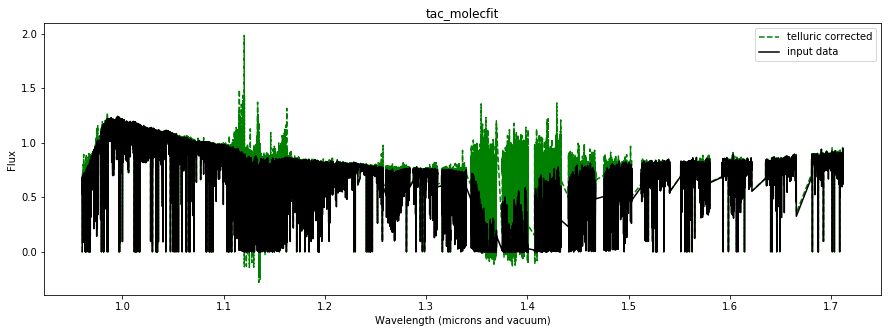

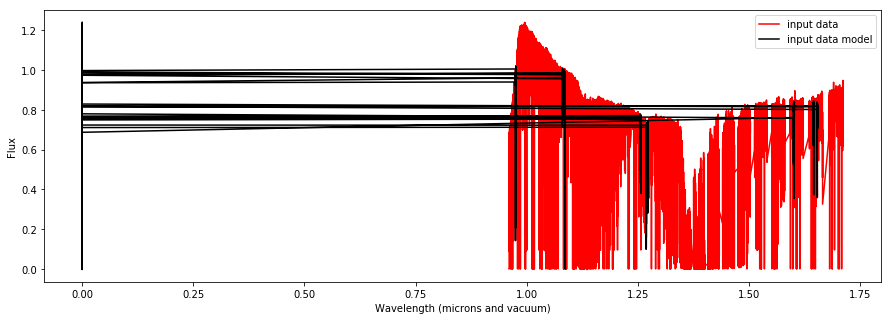

Wavelenghts are zero when no data?


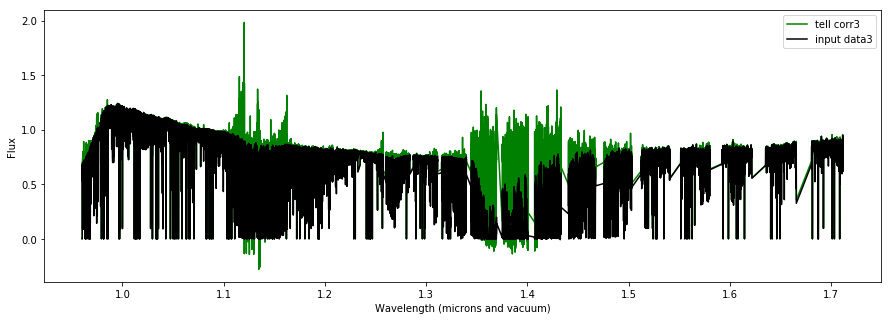

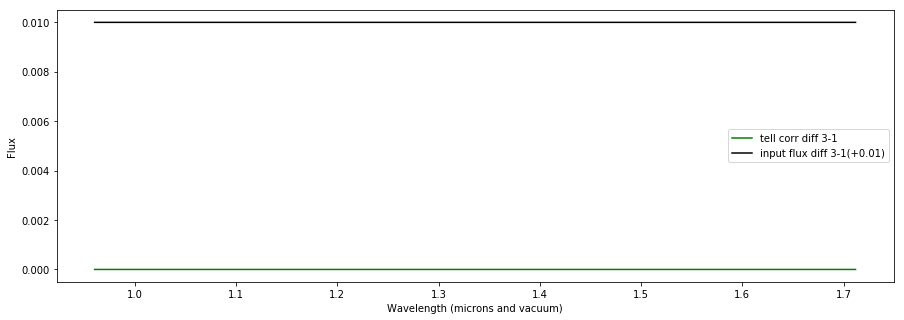

In [79]:
plt.figure(figsize=(15,5))
plt.plot(wl_input, corr_flux, 'g--', label='telluric corrected')
plt.plot(wl_input, input_flux, 'k-', label='input data')
plt.xlabel('Wavelength (microns and vacuum)')
plt.ylabel('Flux')
plt.title("tac_molecfit")
plt.legend()
plt.show()

plt.figure(figsize=(15,5))
plt.plot(wl_input2, input_flux2, 'r-', label='input data')
plt.plot(wl_model2, input_flux2, 'k-', label='input data model')
plt.xlabel('Wavelength (microns and vacuum)')
plt.ylabel('Flux')
plt.title("molecfit")
plt.title("")
plt.legend()
plt.show()
print("Wavelenghts are zero when no data?")

plt.figure(figsize=(15,5))
plt.plot(wl3, corr_flux3, 'g-', label='tell corr3')
plt.plot(wl3, input_flux3, 'k-', label='input data3')
plt.xlabel('Wavelength (microns and vacuum)')
plt.ylabel('Flux')
plt.title("TAC molecfit")
plt.title("")
plt.legend()
plt.show()



plt.figure(figsize=(15,5))
plt.plot(wl3, corr_flux3-corr_flux, 'g-', label='tell corr diff 3-1')
plt.plot(wl3, input_flux3-input_flux +0.01, 'k-', label='input flux diff 3-1(+0.01)')
plt.xlabel('Wavelength (microns and vacuum)')
plt.ylabel('Flux')
plt.title("TAC molecfit")
plt.title("")
plt.legend()
plt.show()

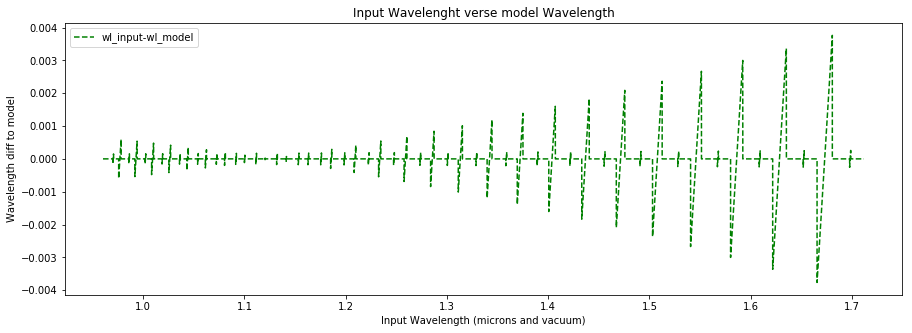

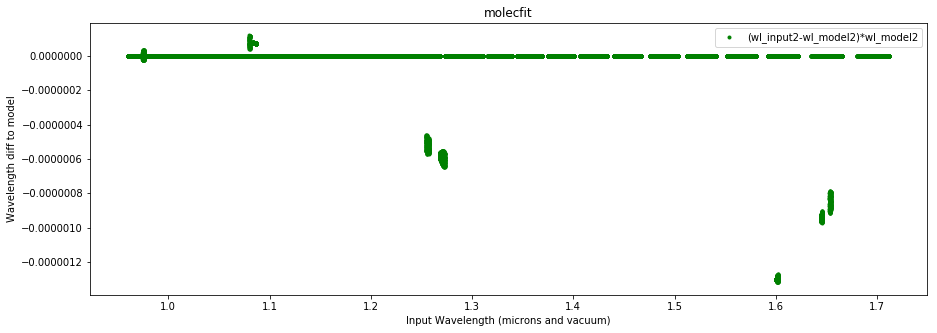

In [69]:
plt.figure(figsize=(15,5))
plt.plot(wl_input, wl_input-wl_model, 'g--', label='wl_input-wl_model')
#plt.plot(wl_input, input_flux, 'k-', label='input data')
plt.xlabel('Input Wavelength (microns and vacuum)')
plt.ylabel('Wavelength diff to model')
plt.title("Input Wavelenght verse model Wavelength")
plt.legend()
plt.show()

plt.figure(figsize=(15,5))
plt.plot(wl_input2, (wl_input2-wl_model2)*wl_model2, 'g.', label='(wl_input2-wl_model2)*wl_model2')
#plt.plot(wl_input, input_flux, 'k-', label='input data')
plt.xlabel('Input Wavelength (microns and vacuum)')
plt.ylabel('Wavelength diff to model')
plt.title("molecfit")
plt.legend()
plt.show()

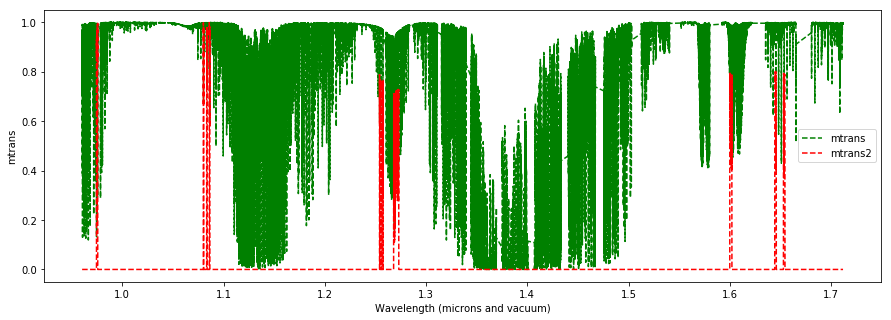

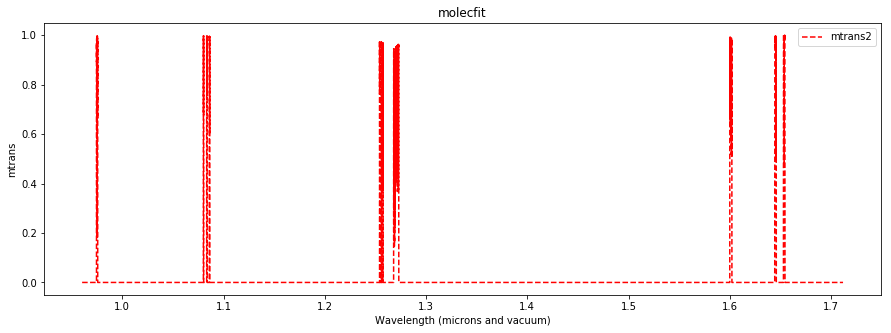

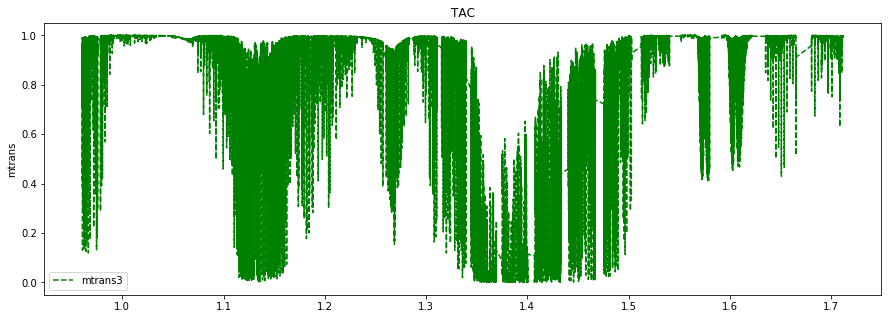

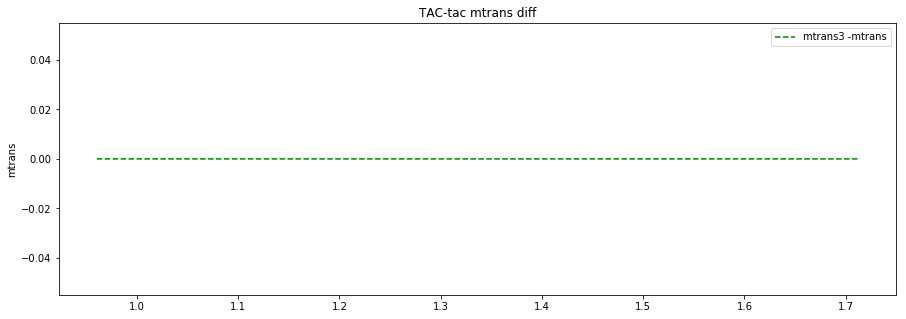

In [110]:

plt.figure(figsize=(15,5))
plt.plot(wl_input, mtrans, 'g--', label='mtrans')
plt.plot(wl_input2, mtrans2*mscal2, 'r--', label='mtrans2*mscale2')
#plt.plot(wl_input, input_flux, 'k-', label='input data')
plt.xlabel('Wavelength (microns and vacuum)')
plt.ylabel('mtrans')
plt.title("")
plt.legend()
plt.show()


plt.figure(figsize=(15,5))
plt.plot(wl_input2, mtrans2, 'r--', label='mtrans2')
#plt.plot(wl_input, input_flux, 'k-', label='input data')
plt.xlabel('Wavelength (microns and vacuum)')
plt.ylabel('mtrans')
plt.title("molecfit")
plt.legend()
plt.show()


plt.figure(figsize=(15,5))
plt.plot(wl3, mtrans3, 'g--', label='mtrans3')
#plt.xlabel('Wavelength (microns and vacuum)')
plt.ylabel('mtrans')
plt.title("TAC")
plt.legend()
plt.show()




plt.figure(figsize=(15,5))
plt.plot(wl3, mtrans3-mtrans, 'g--', label='mtrans3 -mtrans')
#plt.xlabel('Wavelength (microns and vacuum)')
plt.ylabel('mtrans')
plt.title("TAC-tac mtrans diff")
plt.legend()
plt.show()

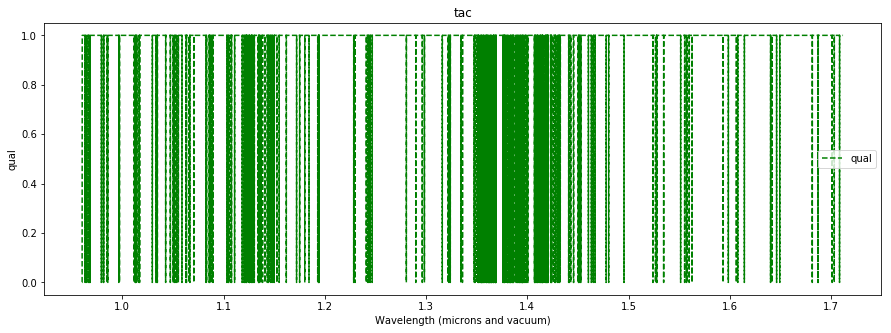

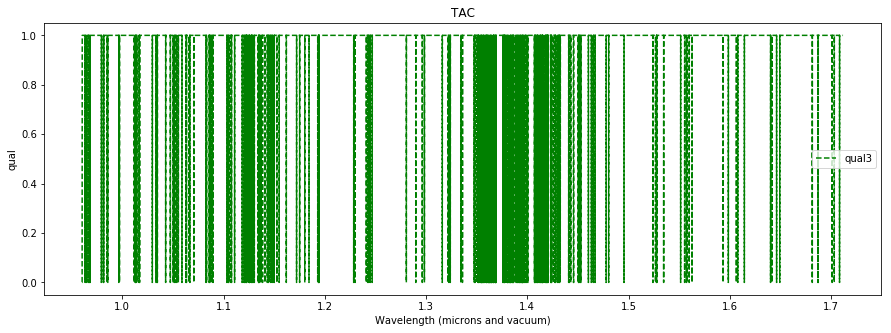

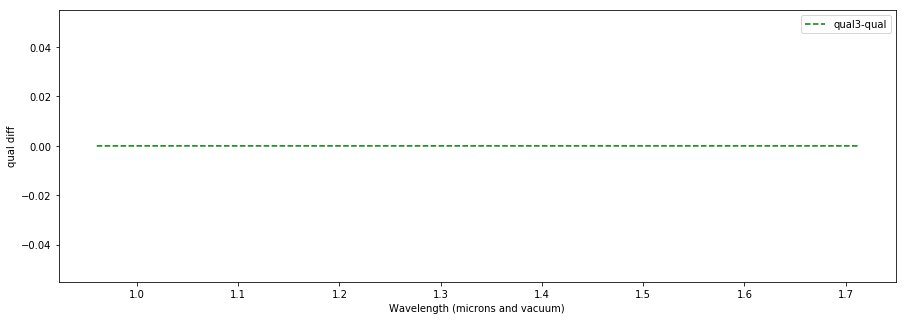

In [73]:
plt.figure(figsize=(15,5))
plt.plot(wl_input, qual, 'g--', label='qual')
#plt.plot(wl_input, input_flux, 'k-', label='input data')
plt.xlabel('Wavelength (microns and vacuum)')
plt.ylabel('qual')
plt.title("tac")
plt.legend()
plt.show()


plt.figure(figsize=(15,5))
plt.plot(wl3, qual3, 'g--', label='qual3')
# plt.plot(wl_input, input_flux, 'k-', label='input data')
plt.xlabel('Wavelength (microns and vacuum)')
plt.ylabel('qual')
plt.title("TAC")
plt.legend()
plt.show()


plt.figure(figsize=(15,5))
plt.plot(wl3, qual3-qual, 'g--', label='qual3-qual')
# plt.plot(wl_input, input_flux, 'k-', label='input data')
plt.xlabel('Wavelength (microns and vacuum)')
plt.ylabel('qual diff')
plt.title("")
plt.legend()
plt.show()

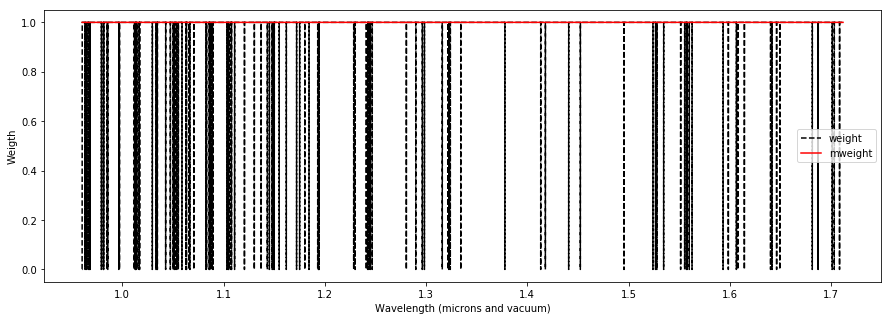

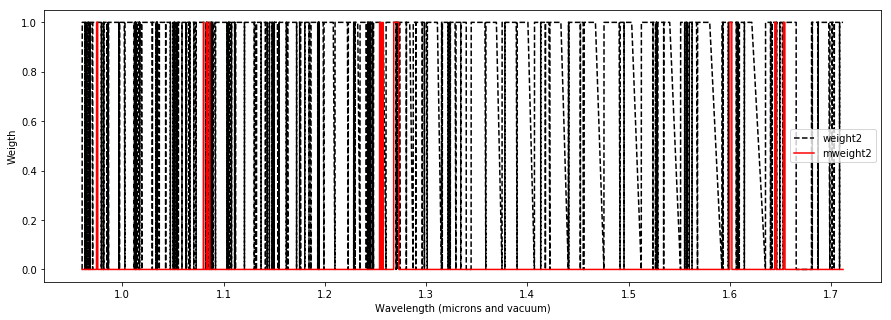

no weight for TAC


In [83]:

plt.figure(figsize=(15,5))
plt.plot(wl_input, weight, 'k--', label='weight')
plt.plot(wl_input, mweight, 'r-', label='mweight')
#plt.plot(wl_input, input_flux, 'k-', label='input data')
plt.xlabel('Wavelength (microns and vacuum)')
plt.ylabel('Weigth')
plt.title("")
plt.legend()
plt.show()


plt.figure(figsize=(15,5))
plt.plot(wl_input2, weight2, 'k--', label='weight2')
plt.plot(wl_input2, mweight2, 'r-', label='mweight2')
#plt.plot(wl_input, input_flux, 'k-', label='input data')
plt.xlabel('Wavelength (microns and vacuum)')
plt.ylabel('Weigth')
plt.title("")
plt.legend()
plt.show()


print("no weight for TAC")

In [ ]:
#wl_input,  input_flux, corr_flux,= tac_molecfit(filename)


#filename2 = 'output/' + file0 + '-sci-gtoc-nir_A_tell_fit.fits'
#wl_input2, input_flux2, mrange2,  mscal2, mflux2,dev2 = molecfit_fit(filename2)

# TAC.fits
#filename3 = 'output/' + 'car-20160325T05h28m38s-sci-gtoc-nir_A_input_TAC.fits'
#wl3= TAC_molecfit(filename3)


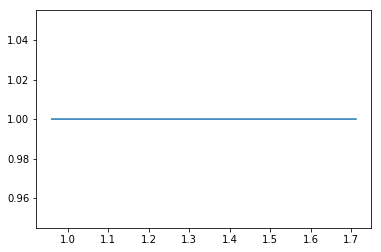

Errors are just 1?


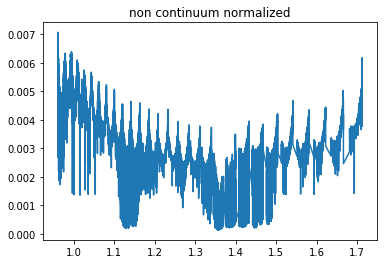

In [94]:
plt.plot(wl3, input_error3)
plt.show()
print("Errors are just 1?")

plt.plot(wl3, input_cont3)
plt.title("non continuum normalized")
plt.show()

These look like the fluxs in the fitted model region


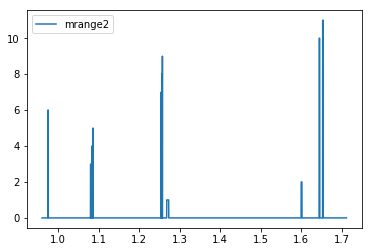

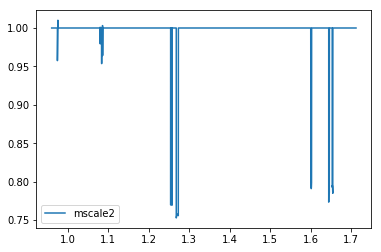

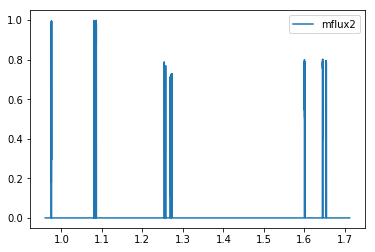

In [98]:
 #mrange2,  mscal2, mflux2,dev2
print("These look like the fluxs in the fitted model region")
plt.plot(wl_input2, mrange2, label="mrange2")
plt.legend()
plt.show()

plt.plot(wl_input2, mscal2, label="mscale2")
plt.legend()
plt.show()

plt.plot(wl_input2, mflux2, label="mflux2")
plt.legend()
plt.show()

In [ ]:
## Filename 1 \*_tell_fit.fits

- input_flux = input data
- corr_flux = Telluric corrected 

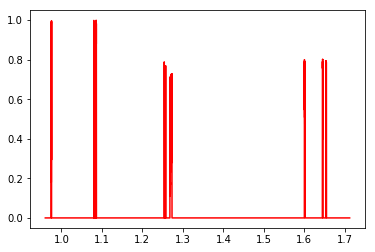

In [21]:

filename2 = 'output/' + file0 + '-sci-gtoc-nir_A_tell_fit.fits'

wl_input, input_flux, weight, mrange, wl_model, mscal, mflux, mweight, dev, mtrans = molecfit_fit(filename2)
plt.plot(wl_input, mtrans*mscal, 'r-', label='atmospheric transmission')


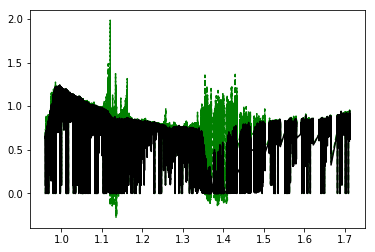

In [12]:



# Load spectrum

file0 = 'car-20160325T05h28m38s'
filename = 'output/' + file0 + '-sci-gtoc-nir_A_tell_tac.fits'
filename2 = 'output/' + file0 + '-sci-gtoc-nir_A_tell_fit.fits'
filename3 = 'output/' + 'car-20160325T05h28m38s-sci-gtoc-nir_A_input_TAC.fits'
wl_input, wl_model, input_flux, corr_flux, mtrans, qual, weight, mweight = tac_molecfit(filename)
plt.plot(wl_input, corr_flux, 'g--', label='telluric corrected')
plt.plot(wl_input, input_flux, 'k-', label='input data')



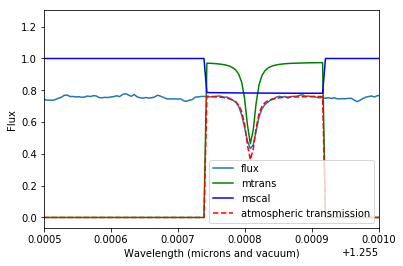

In [107]:
wl_input, input_flux, weight, mrange, wl_model, mscal, mflux, mweight, dev, mtrans = molecfit_fit(filename2)

plt.plot(wl_input, input_flux, label="flux")
plt.plot(wl_input, mtrans, 'g-', label='mtrans')
plt.plot(wl_input, mscal, 'b-', label='mscal')
plt.plot(wl_input, mtrans*mscal, 'r--', label='atmospheric transmission')
plt.xlabel('Wavelength (microns and vacuum)')
plt.ylabel('Flux')
plt.xlim([1.2555, 1.2560])
plt.legend()
plt.show()

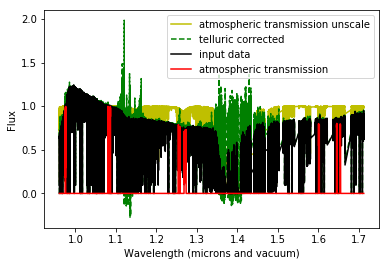

In [113]:
filename = 'output/' + file0 + '-sci-gtoc-nir_A_tell_tac.fits'
wl_input, wl_model, input_flux, corr_flux, mtrans, qual, weight, mweight = tac_molecfit(filename)

# Check how corr_flux is made
#I assume that input_flux / mtrans*mscale


file0 = 'car-20160325T05h28m38s'
filename = 'output/' + file0 + '-sci-gtoc-nir_A_tell_tac.fits'
filename2 = 'output/' + file0 + '-sci-gtoc-nir_A_tell_fit.fits'
filename3 = 'output/' + 'car-20160325T05h28m38s-sci-gtoc-nir_A_input_TAC.fits'
wl_input, wl_model, input_flux, corr_flux, mtrans1, qual, weight, mweight = tac_molecfit(filename)
plt.plot(wl_input, mtrans1, 'y-', label='atmospheric transmission unscale')
plt.plot(wl_input, corr_flux, 'g--', label='telluric corrected')
plt.plot(wl_input, input_flux, 'k-', label='input data')
wl_input, input_flux, weight, mrange, wl_model, mscal, mflux, mweight, dev, mtrans = molecfit_fit(filename2)

plt.plot(wl_input, mtrans*mscal, 'r-', label='atmospheric transmission')
plt.xlabel('Wavelength (microns and vacuum)')
plt.ylabel('Flux')
plt.legend()
plt.show()